# Calculs d'impédances et de fonctions de transfert de circuits électroniques

## Premier cas : circuits bipolaires

Comment calculer l'impédance de ce circuit ?

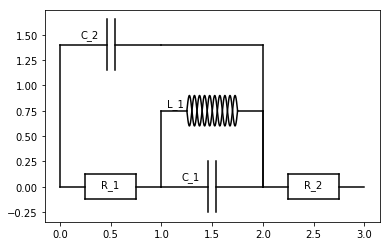

On distingue la description du circuit et le calcul récursif de l'impédance équivalente.

In [ ]:
import sympy as sp

### Description du circuit

Trois composants : résistance, capacitance, inductance.

In [ ]:
from circuits_bipolaires import Resistance, Capacite, Inductance

In [ ]:
R1 = Resistance('R_1')
R1.trace()

In [ ]:
C1 = Capacite('C_1')
C1.trace()

In [ ]:
L1 = Inductance('L_1')
L1.trace()

Circuit en série ou en parallèle ?

In [ ]:
from circuits_bipolaires import Serie, Parallele

In [ ]:
circuit1 = R1 + C1
circuit1.trace()

In [ ]:
circuit2 = R1 | L1
circuit2.trace()

Calcul de l'impédance équivalente.

In [ ]:
omega = sp.Symbol('omega')
circuit1.get_impedance(omega)

In [ ]:
circuit2.get_impedance(omega)

Retour sur le circuit étudié.

In [ ]:
C2 = Capacite(sp.Symbol('C_2')); R2 = Resistance(sp.Symbol('R_2'));

In [ ]:
circuit3 = ((R1+(C1|L1))|(C2)) + R2

In [ ]:
circuit3.trace()

In [ ]:
Z3 = circuit3.get_impedance(omega)
Z3

Application numérique:

In [ ]:
import numpy as np

R1 = Resistance(10); R2 = Resistance(5); C1 = Capacite(1e-6); C2 = Capacite(1e-6); L1 = Inductance(1e-3);
f = 10; omega = 2*np.pi*f;

In [ ]:
Z3_num = circuit3.get_impedance(omega)
Z3_num

## Deuxième cas : circuits avec des tensions imposées

Certains circuits ne sont pas bipolaires. Exemple. Nouvelle façon de le représenter.

Définir les noeuds et les tensions imposées ou inconnues

In [3]:
import sympy as sp

In [4]:
from circuits_transfert import Resistance, Capacite, Inductance, Noeud, Circuit

In [ ]:
E = sp.Symbol('E',real=True); S = sp.Symbol('S',real=True)
noeud1 = Noeud(E, alim=True);
noeud2 = Noeud()
noeud3 = Noeud(S)
noeud4 = Noeud(0, alim=True)

Définir les composants

In [ ]:
R1 = Resistance(sp.Symbol('R_1')); R1.connect(noeud1, noeud2)
R2 = Resistance(sp.Symbol('R_2')); R2.connect(noeud2, noeud3)
R3 = Resistance(sp.Symbol('R_3')); R3.connect(noeud3, noeud4)
C1 = Capacite(sp.Symbol('C_1')); C1.connect(noeud2, noeud3)

Un circuit est défini par la donnée des noeuds et des composants

In [ ]:
circuit = Circuit([noeud1,noeud2,noeud3,noeud4],[R1,R2,R3,C1])

Montrer les équations à chaque noeud

Une méthode permet de calculer la valeur de la tension S en fonction de E (fonction de transfert)

In [ ]:
solutions = circuit.solve(S)
solutions

Diagramme de Bode . Exemple sur le filtre de chebychev ou butterworth

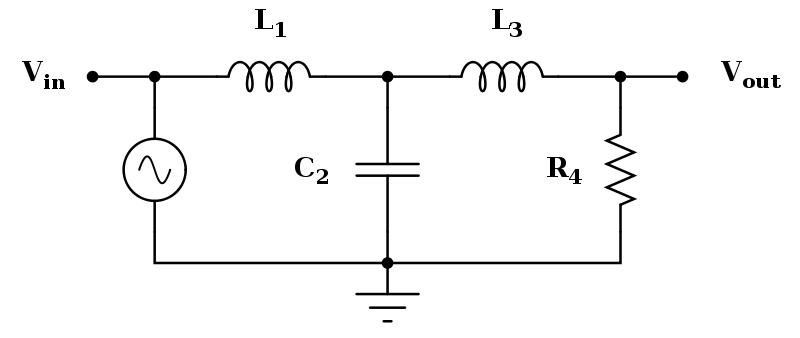

In [5]:
L1 = Inductance('L_1'); L3 = Inductance('L_3'); C2 = Capacite('C_2'); R4 = Resistance('R_4')
Vin = sp.Symbol('V_{in}',real=True); Vout = sp.Symbol('V_{out}',real=True)

Définir les noeuds :

In [6]:
noeud1 = Noeud(Vin, alim=True);
noeud2 = Noeud()
noeud3 = Noeud(Vout)
noeud4 = Noeud(0, alim=True)

Définir les composants :

In [8]:
L1 = Inductance(sp.Symbol('L_1')); L1.connect(noeud1, noeud2)
L3 = Inductance(sp.Symbol('L_3')); L3.connect(noeud2, noeud3)
R4 = Resistance(sp.Symbol('R_4')); R4.connect(noeud3, noeud4)
C2 = Capacite(sp.Symbol('C_2')); C2.connect(noeud2, noeud4)

In [10]:
circuit = Circuit([noeud1,noeud2,noeud3,noeud4],[L1,L3,R4,C2])

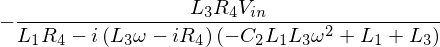

In [11]:
solutions = circuit.solve(Vout)
solutions